In [20]:
%matplotlib inline
import os
import requests
import json
from pprint import pprint
from api_key import api_key
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Save config information
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"


states_id = ['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17', '18', '19',
             '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', 
             '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51',
             '53', '54', '55', '56']

states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 
          'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 
          'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# 01 Alabama, 02 Alaska, 04 Arizona, 05 Arkansas, 06 California, 08 Colorado, 09 Connecticut,
# 10 Delaware, 11 District of Columbia, 12 Florida, 13 Georgia, 15 Hawaii, 16 Idaho,
# 17 Illinois, 18 Indiana, 19 Iowa, 20 Kansas, 21 Kentucky, 22 Louisiana, 23 Maine, 
# 24 Maryland, 25 Massachusetts, 26 Michigan, 27 Minnesota, 28 Mississippi, 29 Missouri, 30 Montana, 
# 31 Nebraska, 32 Nevada, 33 New Hampshire, 34 New Jersey, 35 New Mexico, 36 New York, 37 North Carolina, 
# 38 North Dakota, 39 Ohio, 40 Oklahoma, 41 Oregon, 42 Pennsylvania, 44 Rhode Island, 45 South Carolina,
# 46 South Dakota, 47 Tennessee, 48 Texas, 49 Utah, 50 Vermont, 51 Virginia, 53 Washington, 54 West Virginia, 
# 55 Wisconsin, 56 Wyoming

states_data = {'states_id': states_id, 'states': states}
states_df = pd.DataFrame(states_data)
#states_df.head()

states_df_new = states_df.reset_index(drop=True)
states_short = states_df_new.set_index('states_id')

states_short.head()

,states
states_id,
01,AL
02,AK
04,AZ
05,AR
06,CA


In [3]:
# UNEMPLOYEMNT RATE BY STATE, SEASONALLY ADJUSTED

In [4]:
seriesid = []

for state in states_id:
    seriesid.append(f'LASST'+state+'0000000000003')

#seriesid

In [5]:
startyear = '1999'
endyear = '2018'

# Build query URL

response_all = []

for state in states_id:
    query_url = url + f'LASST'+state+'0000000000003' + "?" + "registrationkey=" + api_key + "&catalog=true&startyear=" + startyear + '&endyear=' + endyear + '&calculations=true&annualaverage=true'
    response_json = requests.get(query_url).json()
    response_all.append(response_json)

response_all[0]

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 238,
 'message': [],
 'Results': {'series': [{'seriesID': 'LASST010000000000003',
    'catalog': {'series_title': 'Unemployment Rate: Alabama (S)',
     'series_id': 'LASST010000000000003',
     'seasonality': 'Seasonally Adjusted',
     'survey_name': 'Local Area Unemployment Statistics',
     'survey_abbreviation': 'LA',
     'measure_data_type': 'unemployment rate',
     'area': 'Alabama',
     'area_type': 'Statewide'},
    'data': [{'year': '2018',
      'period': 'M12',
      'periodName': 'December',
      'value': '3.8',
      'footnotes': [{}],
      'calculations': {'net_changes': {'1': '0.0',
        '3': '0.0',
        '6': '-0.3',
        '12': '-0.1'},
       'pct_changes': {'1': '0.0', '3': '0.0', '6': '-7.3', '12': '-2.6'}}},
     {'year': '2018',
      'period': 'M11',
      'periodName': 'November',
      'value': '3.8',
      'footnotes': [{}],
      'calculations': {'net_changes': {'1': '0.0',
        '3': '-0.1',
   

In [6]:
len(response_all)

51

In [7]:
response_all[2]['Results']['series'][0]['data'][12]

{'year': '2017',
 'period': 'M12',
 'periodName': 'December',
 'value': '4.8',
 'footnotes': [{}],
 'calculations': {'net_changes': {'1': '0.0',
   '3': '0.1',
   '6': '-0.1',
   '12': '-0.4'},
  'pct_changes': {'1': '0.0', '3': '2.1', '6': '-2.0', '12': '-7.7'}}}

In [8]:
response_all[0]['Results']['series'][0]['data'][12]

{'year': '2017',
 'period': 'M12',
 'periodName': 'December',
 'value': '3.9',
 'footnotes': [{}],
 'calculations': {'net_changes': {'1': '0.0',
   '3': '-0.1',
   '6': '-0.4',
   '12': '-1.8'},
  'pct_changes': {'1': '0.0', '3': '-2.5', '6': '-9.3', '12': '-31.6'}}}

In [9]:
#response_all[0]['Results']['series'][0]['data'][12]['calculations']['pct_changes'] WE DO NOT NEED THIS HERE 
# BECAUSE THIS WOULD BE PERCENTAGE CHANGE OF RATES, WHICH IS NOT WHAT WE WANT. WE WANT THE CHANGE IN UNEMPLOYMENT

In [10]:
years = range(0, (2018-2000+1))
state_list = []
year_list = []
value_list = []
pct_changes_list = []

for state_index in range(len(states)):  # iterate over state indices
    for yr in years:  # iterate over years for each state index
        state_list.append(state_index)
        
        year_list.append(
            response_all[state_index]['Results']['series'][0]['data'][yr*12]['year']
        )
        value_list.append(
            response_all[state_index]['Results']['series'][0]['data'][yr*12]['value']
        )
        
print(len(state_list))
print(len(year_list))
print(len(value_list))


969
969
969


In [16]:
values_dict = {'state_id': state_list,
               "year": year_list,
               "unemployment_rate": value_list
             }

df = pd.DataFrame(values_dict)
df.dtypes

state_id              int64
year                 object
unemployment_rate    object
dtype: object

In [17]:
df_num = df.astype({'unemployment_rate': 'float', 'year': 'int64'})
df_num.dtypes

state_id               int64
year                   int64
unemployment_rate    float64
dtype: object

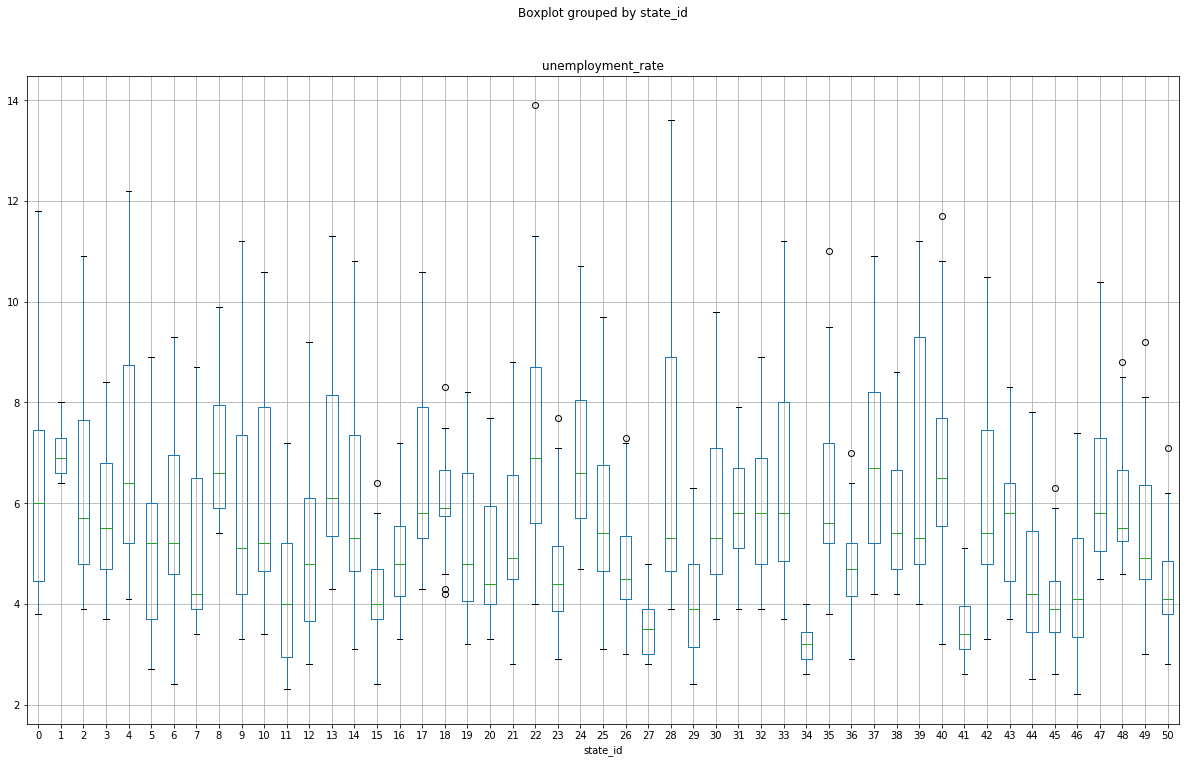

In [29]:
# Create a boxplot to compare means
df_num.boxplot("unemployment_rate", by="state_id", figsize=(20,12))

In [33]:
estados=df_num["state_id"].unique()
print(estados)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [50]:
# Extract individual groups

group_name = {}

for x in estados:
    if 'group'+str(x) not in group_name:
        group_name['group'+str(x)] = df_num[df_num["state_id"] == x]["unemployment_rate"]



In [54]:
stats.f_oneway(group_name['group0'],group_name['group1'],group_name['group2'])

F_onewayResult(statistic=1.1522418726601202, pvalue=0.3235720749562839)

In [ ]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

In [24]:
state_dfs_dictionary = {}
state_ids = set(df['state_id'])

for state in state_ids:
    state_dfs_dictionary[state] = df[df['state_id'] == state]
    
state_dfs_dictionary[1]

,state_id,year,unemployment_rate
19,1,2018,6.5
20,1,2017,6.8
21,1,2016,6.9
22,1,2015,6.7
23,1,2014,6.5
24,1,2013,7.0
25,1,2012,7.0
26,1,2011,7.4
27,1,2010,7.8
28,1,2009,8.0


In [27]:
for st in range(0,51):
    filename = "csv_series/unemployment_states"+str(st)+".csv"
    state_dfs_dictionary[st].to_csv(filename, index=False, header=True)
